<a href="https://colab.research.google.com/github/dcw8161/Regression-Models/blob/main/Mulitple_Linear_Regression_Fuel_Consumption_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Multiple Linear Regression


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#reading_data">Reading the Data</a></li>
        <li><a href="#understanding_data">Understanding the Data</a></li>
        <li><a href="#exploratory_data_analysis">Exploratory Data Analysis</a></li>
        <li><a href="#multiple_regression_model">Multiple Regression Model</a></li>
        <li><a href="#prediction">Prediction</a></li>
         <li><a href="#auto_ml">Auto-ML</a></li>
    </ol>
</div>
<br>
<hr>


### Importing  packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### Read Data

In [2]:
df = pd.read_csv("/content/Fuel consumption 2019.csv")
df

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,2019,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.3,7.5,9.0,211
1042,2019,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,Z,11.3,8.5,10.0,233
1043,2019,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,Z,11.8,8.6,10.4,242
1044,2019,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.3,8.5,10.0,233


## Understand of Data

### `Fuel consumption 2019.csv`:

A fuel consumption dataset, **`Fuel consumption 2019.csv`**, is downloaded ferom Kaggle.  [Dataset source](https://www.kaggle.com/sethirishabh/fuel-consumption)

*   **MODELYEAR**: e.g. 2019
*   **MAKE**: e.g. Acura
*   **MODEL**: e.g. ILX
*   **VEHICLE_CLASS**: e.g. COMPACT
*   **ENGINE_SIZE**: e.g. 2.4
*   **CYLINDERS**: e.g 4
*   **TRANSMISSION**: e.g. AM8
*   **FUEL_TYPE**: e.g. Z
*   **FUEL_CONSUMPTION_CITY**: e.g. 9.9
*   **FUEL_CONSUMPTION_HWY**: e.g 7.0
*   **FUEL_CONSUMPTION_COMBO**: e.g. 8.6
*   **CO2 EMISSIONS**: e.g. 199 

### Exploratory data analysis

Let's first have a descriptive exploration on our data.


In [3]:
# Finding missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Model-Year - 0.0%
Make - 0.0%
Model - 0.0%
Vehicle-Class - 0.0%
Engine-Size - 0.0%
Cylinders - 0.0%
Transmission - 0.0%
Fuel-Type - 0.0%
Fuel-Consumption-City - 0.0%
Fuel-Consumption-Hwy - 0.0%
Fuel-Consumption-Comb - 0.0%
CO2-Emissions - 0.0%


In [4]:
# Find the data types of the features
df.dtypes

Model-Year                 int64
Make                      object
Model                     object
Vehicle-Class             object
Engine-Size              float64
Cylinders                  int64
Transmission              object
Fuel-Type                 object
Fuel-Consumption-City    float64
Fuel-Consumption-Hwy     float64
Fuel-Consumption-Comb    float64
CO2-Emissions              int64
dtype: object

In [6]:
# summarize the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Model-Year,1046.0,2019.000000,0.000000,2019.0,2019.00,2019.00,2019.000,2019.0
Engine-Size,1046.0,3.108795,1.315989,1.0,2.00,3.00,3.600,8.0
Cylinders,1046.0,5.595602,1.796845,3.0,4.00,6.00,6.000,16.0
Fuel-Consumption-City,1046.0,12.378011,3.294286,4.2,10.20,12.05,14.300,26.8
Fuel-Consumption-Hwy,1046.0,9.038050,2.049742,4.0,7.60,8.80,10.200,17.2
Fuel-Consumption-Comb,1046.0,10.872562,2.697321,4.1,9.10,10.60,12.575,22.2
CO2-Emissions,1046.0,251.312620,57.017573,96.0,212.25,248.00,289.000,522.0


In [7]:
# Drop any duplicates
df.drop_duplicates()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,2019,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.3,7.5,9.0,211
1042,2019,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,Z,11.3,8.5,10.0,233
1043,2019,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,Z,11.8,8.6,10.4,242
1044,2019,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.3,8.5,10.0,233


Let's select some features to explore more.

In [5]:
sdf = df[['Engine-Size','Cylinders','Fuel-Consumption-City','Fuel-Consumption-Hwy','Fuel-Consumption-Comb','CO2-Emissions']]
sdf.head(10)

,Engine-Size,Cylinders,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2.4,4,9.9,7.0,8.6,199
1,3.5,6,12.2,9.0,10.8,252
2,3.5,6,12.2,9.5,11.0,258
3,3.0,6,9.1,9.0,9.0,210
4,3.5,6,11.1,10.8,11.0,261
5,2.0,4,11.0,8.6,9.9,232
6,2.0,4,11.3,9.1,10.3,242
7,3.5,6,8.4,8.2,8.4,196
8,2.4,4,10.0,7.1,8.7,205
9,2.4,4,10.2,7.4,8.9,209


Let's plot Emission values with respect to Engine size:


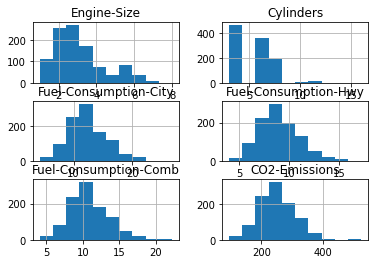

In [9]:
plot = sdf[['Engine-Size','Cylinders','Fuel-Consumption-City','Fuel-Consumption-Hwy','Fuel-Consumption-Comb','CO2-Emissions']]
plot.hist()
plt.show()

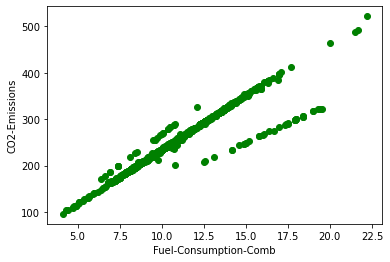

In [ ]:
plt.scatter(sdf['Fuel-Consumption-Comb'], sdf['CO2-Emissions'],  color='green')
plt.xlabel("Fuel-Consumption-Comb")
plt.ylabel("CO2-Emissions")
plt.show()

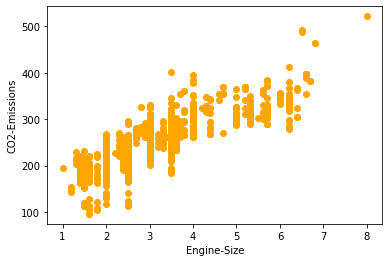

In [ ]:
plt.scatter(sdf['Engine-Size'], sdf['CO2-Emissions'],  color='orange')
plt.xlabel("Engine-Size")
plt.ylabel("CO2-Emissions")
plt.show()

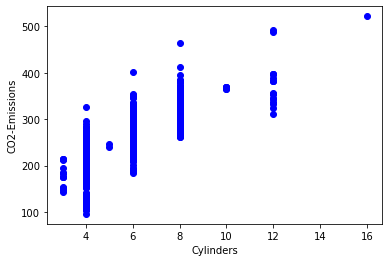

In [ ]:
plt.scatter(sdf['Cylinders'], sdf['CO2-Emissions'],  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("CO2-Emissions")
plt.show()

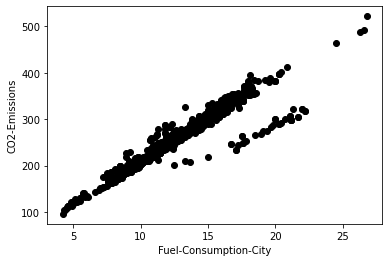

In [ ]:
plt.scatter(sdf['Fuel-Consumption-City'], sdf['CO2-Emissions'],  color='black')
plt.xlabel("Fuel-Consumption-City")
plt.ylabel("CO2-Emissions")
plt.show()

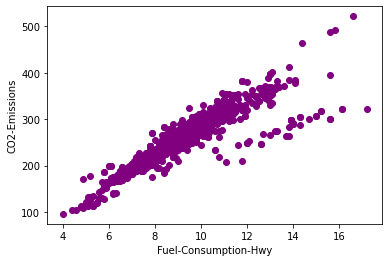

In [ ]:
plt.scatter(sdf['Fuel-Consumption-Hwy'], sdf['CO2-Emissions'],  color='purple')
plt.xlabel("Fuel-Consumption-Hwy")
plt.ylabel("CO2-Emissions")
plt.show()

In [ ]:
# Exploratory Data Analysis using latest AI based AutoEDA Package - sweetviz
!pip install sweetviz

In [ ]:
# Importing the package for use
import sweetviz as sv

# Generate the EDA report
Employee_EDA_report = sv.analyze(df)
# Convert the report to HTML 
Employee_EDA_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### SweetViz Heat Map
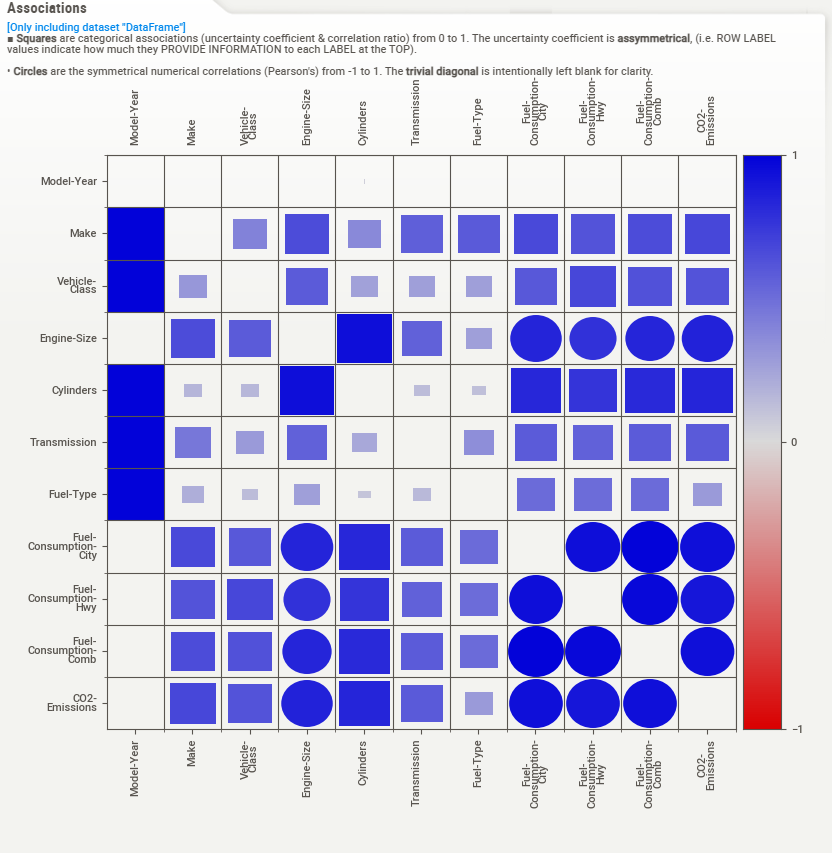

### Numerical and Categorical Associations to CO2-Emission
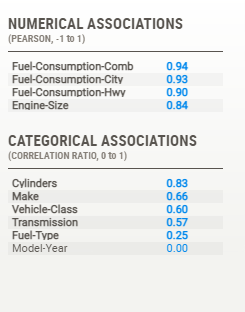

#### Splitting Train and Test Data

Splitting data into Train and Test is an important because we only train the model using Train data set and test the model using test dataset. 

We can use different methods to split the data. 
1. Use of ScikitLearn 
2. Create a mask to select random rows using np.random.rand() function

Here I usethe second methos to split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. 


In [6]:
msk = np.random.rand(len(df)) < 0.8
train = sdf[msk]
test = sdf[~msk]

In [7]:
print('train_shape:', train.shape)
print('test_shape:',test.shape)

train_shape: (846, 6)
test_shape: (200, 6)


<h2 id="multiple_regression_model">Multiple Regression Model</h2>


There are multiple variables depend on the CO2-Emission. Those are listed here for the Multiple Regression is, Engine-Size, Cylinders, Fuel-Consumption-City, Fuel-Consumption-Hwy, Fuel-Consumption-Comb, CO2-Emissions. This is an extention of simple linear regression model. 


In [8]:
from sklearn import linear_model
mlr = linear_model.LinearRegression()
x1 = np.asanyarray(train[['Engine-Size','Cylinders','Fuel-Consumption-Comb']])
y1 = np.asanyarray(train[['CO2-Emissions']])
mlr.fit (x1, y1)
# The coefficients
print ('Coefficients: ', mlr.coef_)

Coefficients:  [[ 4.8202442   3.7100196  16.14237606]]


Coefficient and the Intercept in the simple linear regression are the parameters of the fitted line. That is we have only three parameters, intercept and coefficients of hyperplane. 


#### Ordinary Least Squares (OLS)

Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression). In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable and our predicted output over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)


<h2 id="prediction">Prediction</h2>


**Explained variance regression score:**\
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\
The best possible score is 1.0, the lower values are worse.


[References](https://www.coursera.org/learn/machine-learning-with-python/home/welcome)

In [9]:
y_hat1= mlr.predict(test[['Engine-Size','Cylinders','Fuel-Consumption-Comb']])
x1t = np.asanyarray(test[['Engine-Size','Cylinders','Fuel-Consumption-Comb']])
y1t = np.asanyarray(test[['CO2-Emissions']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat1 - y1t) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % mlr.score(x1t, y1t))

Residual sum of squares: 402.18
Variance score: 0.87


In [10]:
Results1 = pd.DataFrame({'Algorithm': [],'MAE': [], 'R^2': [], "MSE":[], "RMSE":[]})

In [11]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from math import sqrt

In [12]:
res1 = pd.DataFrame({'Algorithm': ['LinearRegression'],'MAE': [mean_absolute_error(y1t, y_hat1)],"R^2": [r2_score(y1t, y_hat1)], "MSE":[mean_squared_error(y1t, y_hat1)], "RMSE":[sqrt(mean_squared_error(y1t, y_hat1))]})
Results1 = Results1.append(res1)

In [13]:
Results1

,Algorithm,MAE,R^2,MSE,RMSE
0,LinearRegression,11.196521,0.868957,402.175816,20.054322


In [14]:
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y1t, y_hat1)
evs

0.8696417476526472

[References](https://www.coursera.org/learn/machine-learning-with-python/home/welcome)

## Auto-ML to find the best model

In [15]:
# Method 1 - Doing Auto ML with PyCaret
!pip install pycaret --upgrade

In [16]:
#To import all regression related Pycaret libraries
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [17]:
# Setting up the regression ML experiment
regression_model_setup = setup(sdf, target = 'CO2-Emissions', normalize = True, 
                                   remove_outliers = True, 
                                   transformation_method='quantile',
                                   train_size = 0.7)

,Description,Value
0,session_id,2235
1,Target,CO2-Emissions
2,Original Data,"(1046, 6)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(696, 7)"


In [18]:
# Running the multiple algorithms
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.3244,90.3248,9.0063,0.9672,0.0328,0.0131,0.410
rf,Random Forest Regressor,3.7614,97.2613,9.4141,0.9647,0.0353,0.0150,0.507
gbr,Gradient Boosting Regressor,4.5383,108.6653,9.6711,0.9604,0.0349,0.0175,0.072
knn,K Neighbors Regressor,4.8765,123.3455,10.7125,0.9558,0.0393,0.0192,0.082
lightgbm,Light Gradient Boosting Machine,5.8081,150.0268,11.8096,0.9465,0.0503,0.0244,0.078
dt,Decision Tree Regressor,4.0898,158.4935,12.1827,0.9433,0.0452,0.0168,0.032
ada,AdaBoost Regressor,10.9667,222.1118,14.7866,0.9181,0.0562,0.0444,0.085
ridge,Ridge Regression,10.8568,335.5729,17.8660,0.8813,0.0677,0.0449,0.025
br,Bayesian Ridge,10.8698,335.5200,17.8669,0.8813,0.0677,0.0450,0.022
lr,Linear Regression,10.8438,336.1909,17.8798,0.8811,0.0677,0.0449,0.496


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2235, verbose=0, warm_start=False)

In [19]:
# Creating the model with the best algorithm based on the above results
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.6176,79.0452,8.8907,0.9701,0.0356,0.0150
1,4.0815,122.4374,11.0651,0.9552,0.0367,0.0149
2,3.2322,86.4987,9.3005,0.9616,0.0345,0.0124
3,3.0299,50.8480,7.1308,0.9832,0.0277,0.0122
4,3.7295,103.4533,10.1712,0.9717,0.0370,0.0148
5,3.4687,91.1092,9.5451,0.9707,0.0325,0.0125
6,3.8985,233.9700,15.2961,0.9097,0.0484,0.0137
7,3.9046,89.7791,9.4752,0.9677,0.0361,0.0160
8,1.4354,10.2281,3.1981,0.9945,0.0131,0.0062
9,2.8458,35.8789,5.9899,0.9879,0.0263,0.0129


Extra Tree Regressor is the best model for this problem using Auto_ML